# FIT5202 Data processing for big data Assignment 1

##  Part A: Analysing Text Data

In this part, we will look into modern software development methodologies. The                         everyday job of a data scientist / data engineer / software engineer involves working in a                                 project team and following software development methodologies to develop software                     products or do data analysis. To prepare for such a career, it would be useful to have                                   knowledge on the common software development methodologies. In this assignment,                     we will analyse two books on software development methodologies. We will see the                           distribution of words, the most common words in both books and the average frequency..                             This approach can also be scaled to find the most common words and distribution of all                                 words in the Internet.    

Required Dataset (available in Moodle):  
- Book1:​ "Agile Processes in Software Engineering and Extreme Programming.txt"  
- Book2:​ "Scrum Handbook.txt" 

##  Step 01: Import ​pyspark ​and initialize Spark  

pyspark ​is the Spark Python API that exposes the Spark programming model to                           Python. ​SparkContext ​is the main entry point for Spark functionality. In Spark,                         communication occurs between a driver and executors. The driver has Spark jobs that it                             needs to run and these jobs are split into tasks that are submitted to the executors for                                   completion. The results from these tasks are delivered back to the driver. In order to use                                 Spark and its API, we will need to use a ​SparkContext​. When running Spark, you start a                                   new Spark application by creating a SparkContext. When the SparkContext is created, it                           asks the master for some cores to use to do the processing. The master sets these cores                                   aside; they won’t be used for other applications.    

Write the code to create a ​ S p a r k C o n t e x t ​ object, which tells Spark how to access a                              cluster. To create a SparkContext you first need to build a​SparkConf​object that contains                               information about your application. Give an appropriate name for your application and                         run Spark locally with as many working processors as logical cores on your machine.  

In [1]:
# Create a spark context.
from pyspark import SparkContext, SparkConf 
from pyspark.sql import SparkSession 
sc = SparkContext.getOrCreate()
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Assignment1 Part A")
spark = SparkSession(sparkContext=sc)

##  Step 02: Create Resilient Distributed Datasets (RDDs)  

A ​SparkContext​ can be used to create Resilient Distributed Datasets (RDDs) on a cluster.  Write the code ​ in pyspark to read the required dataset and display the total number of lines  in each dataset.  

In [2]:
# Read the txt file into rdd.
rdd1 = sc.textFile('Agile Processes  in Software Engineering  and Extreme Programming.txt')
rdd2 = sc.textFile('Scrum Handbook.txt')
print('Agile contains %d lines, and Scrum contains %d lines'%(rdd1.count(),rdd2.count()))

Agile contains 21569 lines, and Scrum contains 4617 lines


### Answer
Agile contains 21569 lines, and Scrum contains 4617 lines

##  Step 03: ​Cleaning/Manipulating text. 

 Words should be counted independent of their case. So, you will have to change                             all words to lowercase. Further, if there are any leading or trailing spaces on a line, it                                   should be removed.  
 Write a function that performs the following tasks on the RDDs:  
 1. Removes all characters which are not alphabets except space(s).   
 2. Changes all upper case letters to lowercase..  
 3. Removes all leading or trailing spaces.  

You can use the python module ​re ​for matching patterns. Finally, display the contents of  the RDDs after applying the function. 


In [3]:
# Use re to delete all characters which are not alphabets except space(s).
import re
rule = re.compile(r'[^a-zA-Z ]')

rdd1 = rdd1.map(lambda x : rule.sub('', x))
rdd2 = rdd2.map(lambda x : rule.sub('', x))

rdd1 = rdd1.map(lambda x : x.lower())
rdd2 = rdd2.map(lambda x : x.lower())

rdd1 = rdd1.map(lambda x : x.strip()).filter(lambda x : len(x) > 0)
rdd2 = rdd2.map(lambda x : x.strip()).filter(lambda x : len(x) > 0)

In [4]:
# Show top 10
rdd1.take(10)

['lnbip',
 'i helen sharp',
 'tracy hall eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference xp',
 'edinburgh uk may',
 'proceedings',
 'springer open']

In [5]:
# Show top 10
rdd2.take(10)

['jeff sutherlands',
 'scrum handbook',
 'everything',
 'you need',
 'to know',
 'to start',
 'a scrum project',
 'in your',
 'organization',
 'scrum']

##  Step 04: Transforming the Data/Counting the words  

Apply a transformation that will split each element of the RDD by its spaces and                               then create a word pairs for e.g. ('agile', 1), ('handbook', 1). Then, count the frequency of                                 each word and ​display the top 20 most frequent words 

In [6]:
# Split lines into single word.
rdd1 = rdd1.flatMap(lambda x : x.split(' ')).filter(lambda x : len(x) > 0)
rdd2 = rdd2.flatMap(lambda x : x.split(' ')).filter(lambda x : len(x) > 0)

# Group by word
rdd1 = rdd1.map(lambda x : (x, 1)).reduceByKey(lambda x, y : x + y)
rdd2 = rdd2.map(lambda x : (x, 1)).reduceByKey(lambda x, y : x + y)

# Swop the location so it can be sort by key
rdd1 = rdd1.map(lambda x : (x[1], x[0])).sortByKey(ascending = False)
rdd2 = rdd2.map(lambda x : (x[1], x[0])).sortByKey(ascending = False)

# Swop the location back
rdd1 = rdd1.map(lambda x : (x[1], x[0]))
rdd2 = rdd2.map(lambda x : (x[1], x[0]))

In [7]:
# Show top 20 most frequent words
rdd1.take(20)

[('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737),
 ('was', 711)]

In [8]:
# Show top 20 most frequent words
rdd2.take(20)

[('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119),
 ('by', 118)]

##  Step 05: Removing Stop Words

In computing, stop words are words which are filtered out before or after                           processing of natural language data. ​In natural language processing, useless words                     (data), are referred to as stop words. We would not want these words taking up space in                                   our database, or taking up valuable processing time. For this, we can remove them easily,                               by storing a list of words that you consider to be stop words. ​NLTK(Natural Language                               Toolkit)​ in python has a list of stopwords stored in 16 different languages.   

Write the code to remove stop words from the RDDs. You should use ​nltk​ package                               to remove the stop words. ​Also find how many unique words do we now have in each RDD? 


In [9]:
# Get the stop words from nltk
from nltk.corpus import stopwords
words = stopwords.words('english')

# Filter the stop words
rdd1 = rdd1.filter(lambda x : x[0] not in words)
rdd2 = rdd2.filter(lambda x : x[0] not in words)

print('There are %d unique words in RDD1 and %d unique words in RDD2'%(rdd1.count(),rdd2.count()))

There are 9611 unique words in RDD1 and 2936 unique words in RDD2


### Answer
There are 9611 unique words in RDD1 and 2936 unique words in RDD2.

##  Step 06: Find the average occurrence of a word 

To find the average occurrence of a word, you will have to find the total number                                 of words and divide that by the number of unique words.  

Write the code to find the average occurrences of the words. 


In [10]:
# Count the total number of words in books.
total1 = rdd1.map(lambda x : x[1]).reduce(lambda x, y : x + y)
total2 = rdd2.map(lambda x : x[1]).reduce(lambda x, y : x + y)

print('The average occurrences of the words in RDD1 is %.2f'% (total1 / rdd1.count()))
print('The average occurrences of the words in RDD2 is %.2f'% (total2 / rdd2.count()))

The average occurrences of the words in RDD1 is 8.23
The average occurrences of the words in RDD2 is 3.68


### Answer
The average occurrences of the words in RDD1 is 8.23, and the average occurrences of the words in RDD2 is 3.68.

##  Step 07: Exploratory data analysis 

Analyze the distribution of the words using the standard python library                         matplotlib. ​Please make sure you are aware of the different factors such as​visual effects ​ ,                              coordinate system, labels ​ , ​data type and scale and informative interpretation before data                        visualisation . Also consider other aspects of visualization like ​clarity ​ , ​accuracy ​ and                        efficiency ​ as well. 
- Compare the distribution of words in Book1 and Book2 The data spans many orders                             of magnitude and the features of the distribution not quite evident in the linear space.                               Therefore, use log scale (base 10) to plot the graph. Explain your understanding                           based on the graphs.  
- Compare the top 15 most common words in Book1 and Book2. Plot the graphs and  explain your understanding of the graph. 

### Question 1
Compare the distribution of words in Book1 and Book2 The data spans many orders of magnitude and the features of the distribution not quite evident in the linear space. Therefore, use log scale (base 10) to plot the graph. Explain your understanding based on the graphs.

In [11]:
import matplotlib.pyplot as mp

# Transform the rdd to list
list1 = rdd1.map(lambda x : x[1]).collect()
list2 = rdd2.map(lambda x : x[1]).collect()

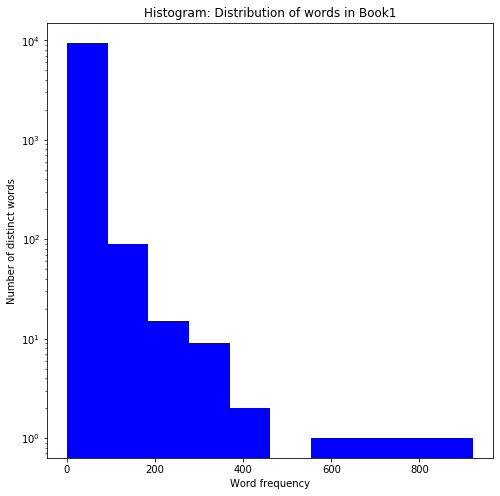

In [12]:
# Create a histogram plot and set the color, title, label and size.
mp.hist(list1, color = 'blue', rwidth = 100, log = True)
mp.title('Histogram: Distribution of words in Book1')
mp.xlabel('Word frequency')
mp.ylabel('Number of distinct words')
mp.gcf().set_size_inches(8,8)

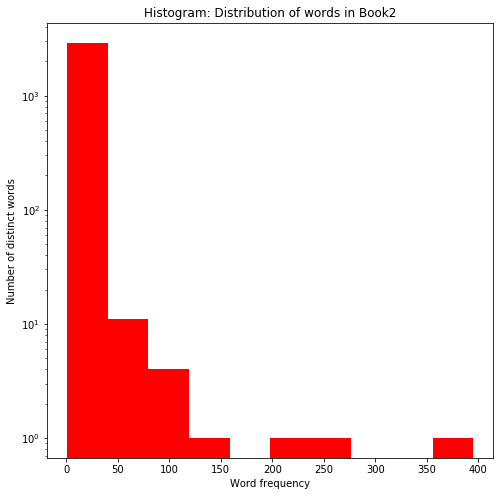

In [13]:
# Create a histogram plot and set the color, title, label and size.
mp.hist(list2, color = 'red', rwidth = 100, log = True)
mp.title('Histogram: Distribution of words in Book2')
mp.xlabel('Word frequency')
mp.ylabel('Number of distinct words')
mp.gcf().set_size_inches(8,8)

### Answer 1
Most of words in these books has low frequency. The words in Book1 has high frequency compared with words in Book2.

### Question 2
Compare the top 15 most common words in Book1 and Book2. Plot the graphs and  explain your understanding of the graph. 

In [14]:
# Save the top 15 in list
top1 = rdd1.take(15).copy()
top2 = rdd2.take(15).copy()

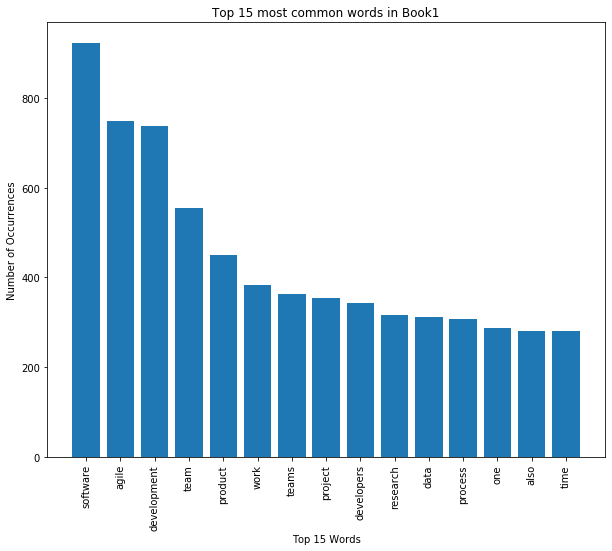

In [15]:
# Create the list for x-axis and y-axis
words1 = list()
count1 = list()
for i in top1:
    words1.append(i[0])
    count1.append(i[1])

# Creat the bar plot and set the title, labels and size.
fig, ax = mp.subplots()
ax.bar(words1, count1)
ax.set_title('Top 15 most common words in Book1')
ax.set_xticklabels(words1, rotation = 'vertical')
ax.set_xlabel('Top 15 Words')
ax.set_ylabel('Number of Occurrences')
fig.set_size_inches(10,8)

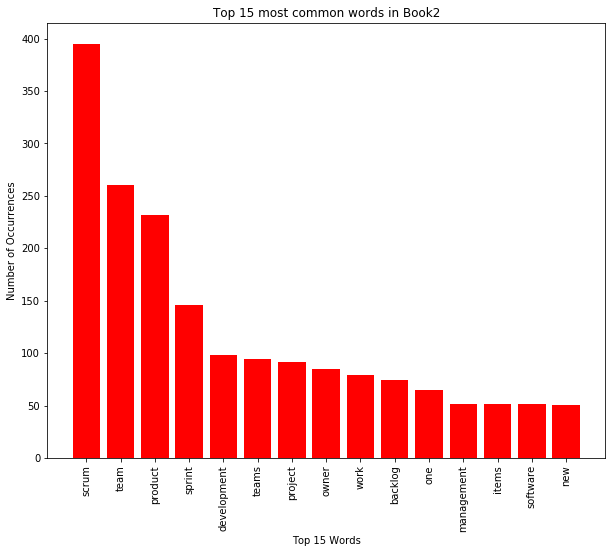

In [16]:
# Create the list for x-axis and y-axis
words2 = list()
count2 = list()
for i in top2:
    words2.append(i[0])
    count2.append(i[1])

# Creat the bar plot and set the color, title, labels and size.
fig, ax = mp.subplots()
ax.bar(words2, count2, color = 'red')
ax.set_title('Top 15 most common words in Book2')
ax.set_xticklabels(words2, rotation = 'vertical')
ax.set_xlabel('Top 15 Words')
ax.set_ylabel('Number of Occurrences')
fig.set_size_inches(10, 8)

### Answer 2
In Book1, the most common word is "software". In Book2, the most common word is "scrum". The Book1 talks about Agile, but the word "agile" is not the most common word in Book1. 